# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
#Importing the important libraries

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

 ## Step 1: Reading and Understanding the Data

In [3]:
# Read the given csv file dataset

BoomBikes = pd.read_csv("day.csv")

In [4]:
# Let's have a look at our dataset 

BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Determining the number of rows and columns

BoomBikes.shape

(730, 16)

In [6]:
#Datatypes of each column

BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Let's get some basic idea of data using describe()

BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


 # Missing Values

In [8]:
#Checking missing values

BoomBikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Renaming the columns

BoomBikes.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
BoomBikes.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Mapping variables season, month, weathersit, weekday .
#converting numerical variables associated with lebels into categorical variables.

BoomBikes['season']=BoomBikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
BoomBikes['month']=BoomBikes.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
BoomBikes['weathersit']=BoomBikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
BoomBikes['weekday']=BoomBikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

BoomBikes.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
BoomBikes.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
BoomBikes.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Data Visualisation


# Identify Continuous and Categorical Features

In [13]:
#Checking the unique values in the data

BoomBikes.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

# Visualising the Relationship among Numeric Variables

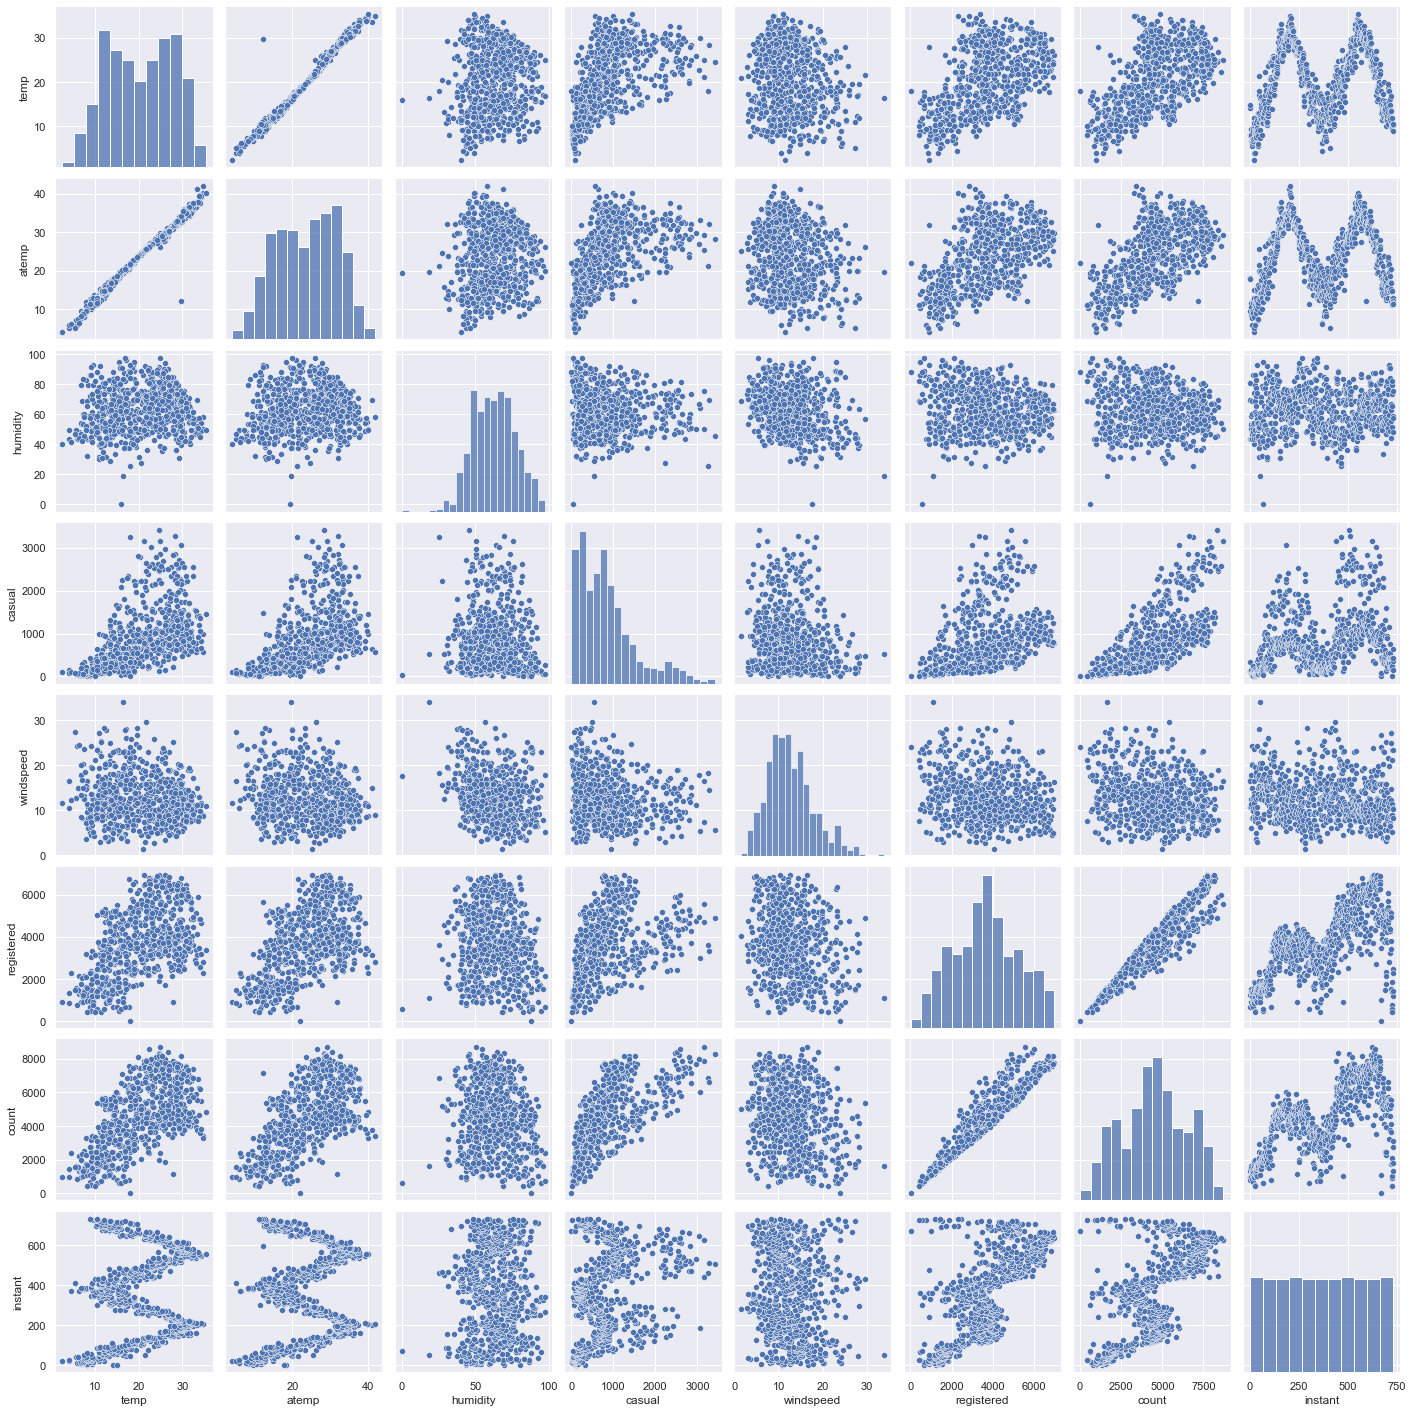

In [15]:
#Let's make a pairplot of all the numeric variables

sns.pairplot(BoomBikes,vars=["temp",'atemp', "humidity",'casual','windspeed','registered','count','instant'])
plt.show()

BoomBikes are more correlated to temp and atemp.

We can see that there are some independent variables look positively correlated to the 'count' variable.


# Visualising Categorical Variables

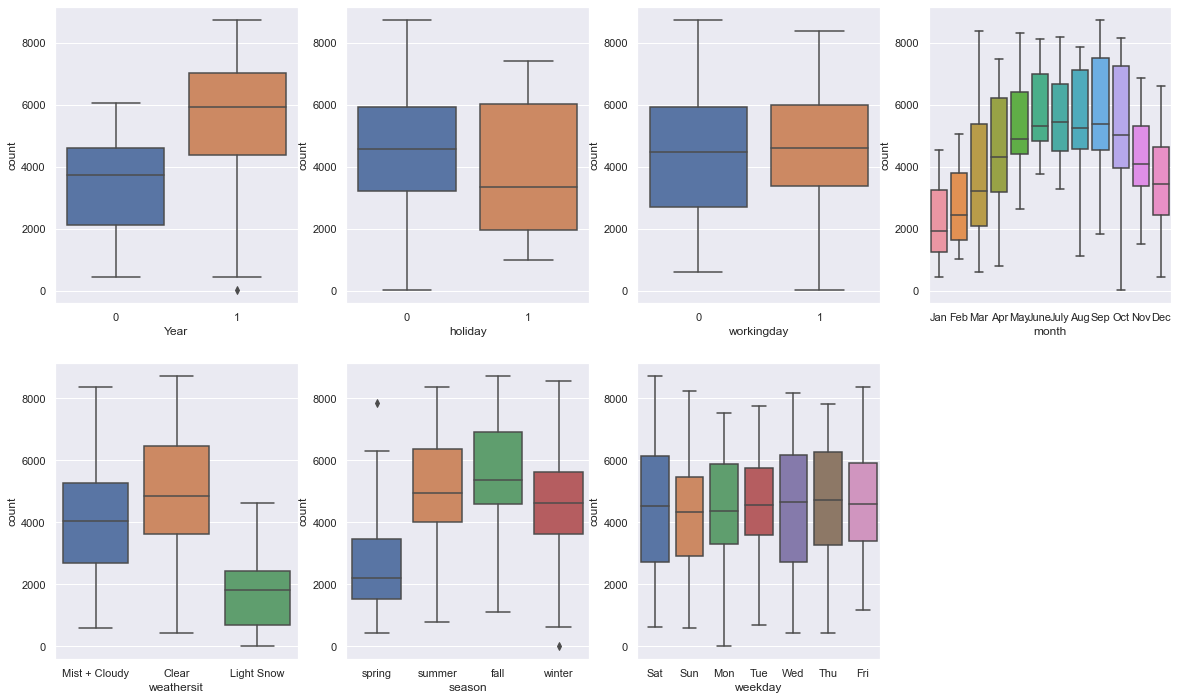

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = BoomBikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = BoomBikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = BoomBikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = BoomBikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = BoomBikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = BoomBikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = BoomBikes)
plt.show()

BoomBikes are more :

1)during the Fall season and then in summer after that winter and spring.

2)in the year 2019 as compared to 2018.

3)in clear weathersit after that in mistcloudy and lightsnow.

4)on Friday and sunday.

5)in september after that in october.

# Univariate Analysis

# 1: Season

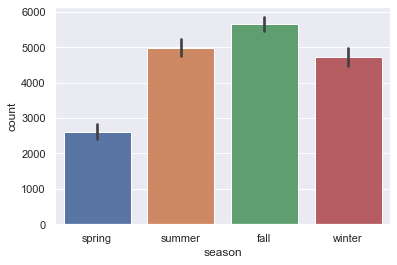

In [17]:
#Relation between season and count of BoomBikes

sns.barplot(x='season',y='count',data=BoomBikes)
plt.show()

BoomBikes are more during the Fall(Monsoon) season and then in summer.


# 2: Weathersit

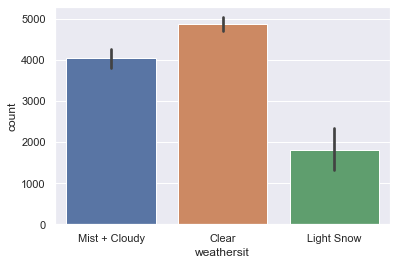

In [18]:
#Relation between weather and count of BoomBikes
sns.barplot(x='weathersit',y='count',data=BoomBikes)
plt.show()

BoomBikes seems to be rented more in clear weathersit.

# 3: workingday

if day is neither weekend nor holiday is 1,
otherwise is 0.

<AxesSubplot:xlabel='workingday', ylabel='count'>

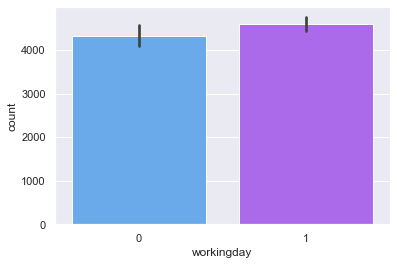

In [19]:
sns.barplot(x='workingday',y='count',data=BoomBikes,palette='cool')

# 3: Year

year (0: 2018, 1:2019)

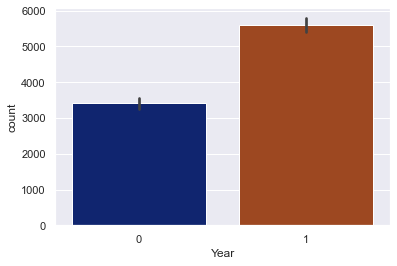

In [20]:
#Relation between Year and count of BoomBikes
sns.barplot(x='Year',y='count',data=BoomBikes,palette='dark')
plt.show()

BoomBikes popularity has increased in 2019 when compared to 2018.

# 4: Month


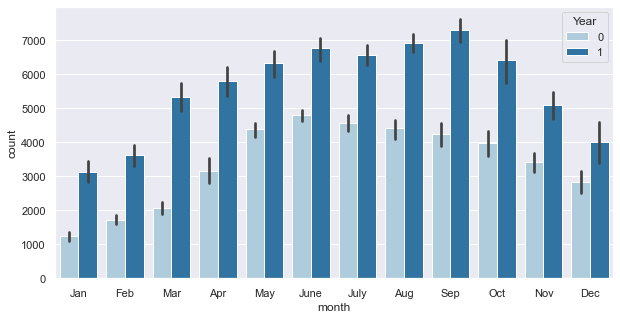

In [21]:
#Relation between month and count of BoomBikes
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',hue='Year',data=BoomBikes,palette='Paired')
plt.show()

# 5: WeekDay

<AxesSubplot:xlabel='weekday'>

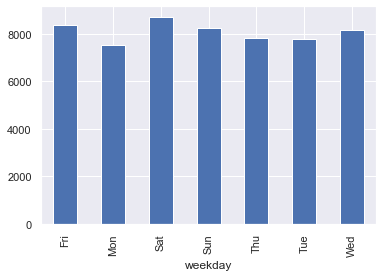

In [22]:
BoomBikes.groupby('weekday')['count'].max().plot(kind='bar')

BoomBikes are maximum on Sunday and Monday.

# 6: Temperature

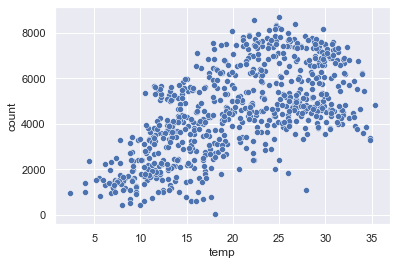

In [23]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=BoomBikes)
plt.show()

BoomBikes Rentals are observed higher in temperatures.

# 7: Humidity

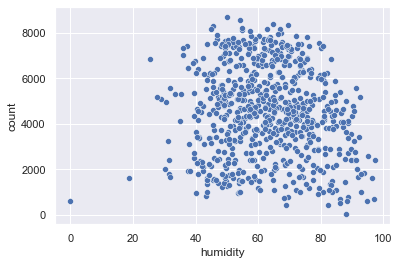

In [24]:
sns.scatterplot(x='humidity', y='count',data=BoomBikes)
plt.show()

Temperature being directly proportional to Humidity, BoomBikes are making during high humidity.

# 8: atemp

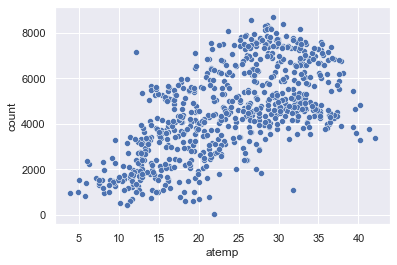

In [25]:
sns.scatterplot(x='atemp',y='count',data=BoomBikes)
plt.show()

BoomBikes are observed at higher "feel-like" temperatures.

# 9: Windspeed

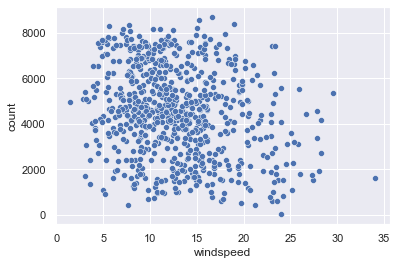

In [26]:
sns.scatterplot(x='windspeed',y='count',data=BoomBikes)
plt.show()

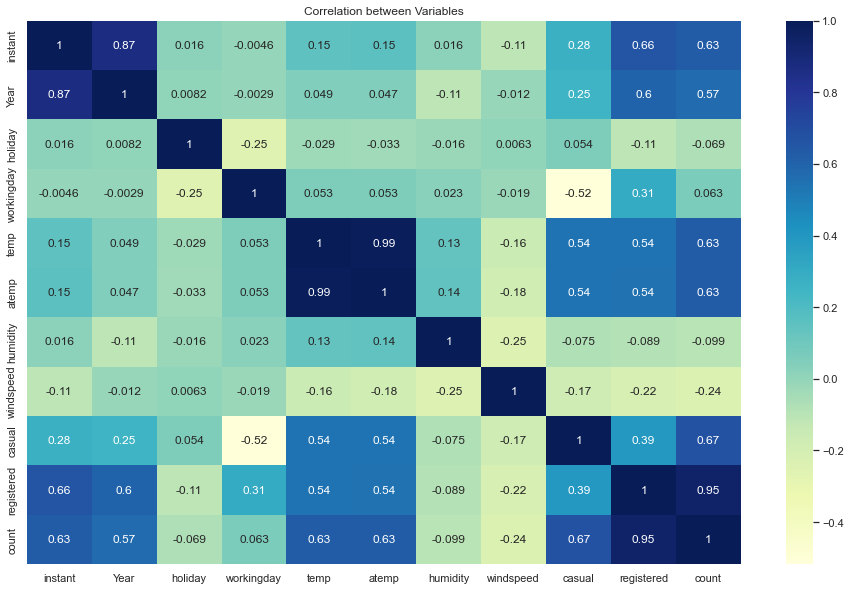

In [27]:
#Heatmap to see correlation between variables
#let check the correlation

plt.figure(figsize = (16, 10))
sns.heatmap(BoomBikes.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between Variables")
plt.show()

We can see temp,atemp,casual,registered,instant variables are correlated to 'count' variable.

 # step 3: Drop Unnecessary Columns

In [28]:
#from the above we can see that instant is an index column so we drop it.

BoomBikes.drop(['instant'],axis=1,inplace=True)
BoomBikes.head()

,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

BoomBikes.drop('holiday',axis=1,inplace=True)
BoomBikes.head()

,dteday,season,Year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,spring,0,Jan,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

BoomBikes.drop(['dteday'],axis=1,inplace=True)
BoomBikes.head()

,season,Year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,0,Jan,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [31]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered

BoomBikes.drop(['casual','registered'],axis=1,inplace=True)
BoomBikes.head()

,season,Year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop atemp and consider temp

BoomBikes.drop(['atemp'],axis=1,inplace=True)
BoomBikes.head()

,season,Year,month,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## Step 4: Data Preparation

# Creating Dummy variables

In [33]:
# Dummy variables for month, season, weathersit, weekday,working day.

months=pd.get_dummies(BoomBikes.month,drop_first=True)
weekdays=pd.get_dummies(BoomBikes.weekday,drop_first=True)
weather_sit=pd.get_dummies(BoomBikes.weathersit,drop_first=True)
seasons=pd.get_dummies(BoomBikes.season,drop_first=True)


In [34]:
# Combining the results to the original bike dataframe

BoomBikes=pd.concat([months,weekdays,weather_sit,seasons,BoomBikes],axis=1)
BoomBikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,season,Year,month,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,spring,0,Jan,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [35]:
# Dropping the categorical variables as they are already dummy-encoded.

BoomBikes.drop(['season','weathersit','weekday','month'],axis=1,inplace=True)
BoomBikes.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,9.305237,43.6957,12.522300,1600


In [36]:
#Number of rows and columns
BoomBikes.shape

(730, 28)

In [37]:
BoomBikes.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,...,0.336986,0.246575,0.252055,0.243836,0.500000,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,...,0.473004,0.431313,0.434490,0.429689,0.500343,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


 ## Step 5: Splitting the Data into Training and Testing Sets

 Before model building, We first need to perform the test-train split and scale the features .i.e, the first basic step for regression is performing a train-test split.

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio).
# We specify 'random_state' so that the train and test data set always have the same rows, respectively.

np.random.seed(0)
Bikes_train, Bikes_test = train_test_split(BoomBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
#Rows and columns after split

print(Bikes_train.shape)
print(Bikes_test.shape)

(510, 28)
(219, 28)


In [40]:
Bikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,19.201653,55.8333,12.208807,7534
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,29.246653,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,16.980847,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,10.489153,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,15.443347,48.9583,8.708325,4220


In [41]:
Bikes_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,29.793347,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,32.082500,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,19.270000,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,29.315000,30.5000,19.583229,4968


In [42]:
Bikes_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            510 non-null    uint8  
 1   Dec            510 non-null    uint8  
 2   Feb            510 non-null    uint8  
 3   Jan            510 non-null    uint8  
 4   July           510 non-null    uint8  
 5   June           510 non-null    uint8  
 6   Mar            510 non-null    uint8  
 7   May            510 non-null    uint8  
 8   Nov            510 non-null    uint8  
 9   Oct            510 non-null    uint8  
 10  Sep            510 non-null    uint8  
 11  Mon            510 non-null    uint8  
 12  Sat            510 non-null    uint8  
 13  Sun            510 non-null    uint8  
 14  Thu            510 non-null    uint8  
 15  Tue            510 non-null    uint8  
 16  Wed            510 non-null    uint8  
 17  Light Snow     510 non-null    uint8  
 18  Mist + Cl

In [43]:
Bikes_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            510 non-null    uint8  
 1   Dec            510 non-null    uint8  
 2   Feb            510 non-null    uint8  
 3   Jan            510 non-null    uint8  
 4   July           510 non-null    uint8  
 5   June           510 non-null    uint8  
 6   Mar            510 non-null    uint8  
 7   May            510 non-null    uint8  
 8   Nov            510 non-null    uint8  
 9   Oct            510 non-null    uint8  
 10  Sep            510 non-null    uint8  
 11  Mon            510 non-null    uint8  
 12  Sat            510 non-null    uint8  
 13  Sun            510 non-null    uint8  
 14  Thu            510 non-null    uint8  
 15  Tue            510 non-null    uint8  
 16  Wed            510 non-null    uint8  
 17  Light Snow     510 non-null    uint8  
 18  Mist + Cl

# Step 6: Rescaling the Features

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

Min-Max scaling (Normalisation):Between 0 and 1

Standardisation :mean-0, sigma-1


# Min-Max scaling


In [44]:
#import the library

from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except the'dummy' variables.
#Create a list of numeric variables

num_vars=['temp','humidity','windspeed','count']

In [47]:
#Fit on data
Bikes_train[num_vars] = scaler.fit_transform(Bikes_train[num_vars])
Bikes_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0.395666,0.504508,0.188475,0.482973


In [48]:
#Checking numeric variables(min and max) after scaling
Bikes_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.343137,0.243137,0.245098,0.24902,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.475223,0.429398,0.430568,0.43287,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1.

Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors.

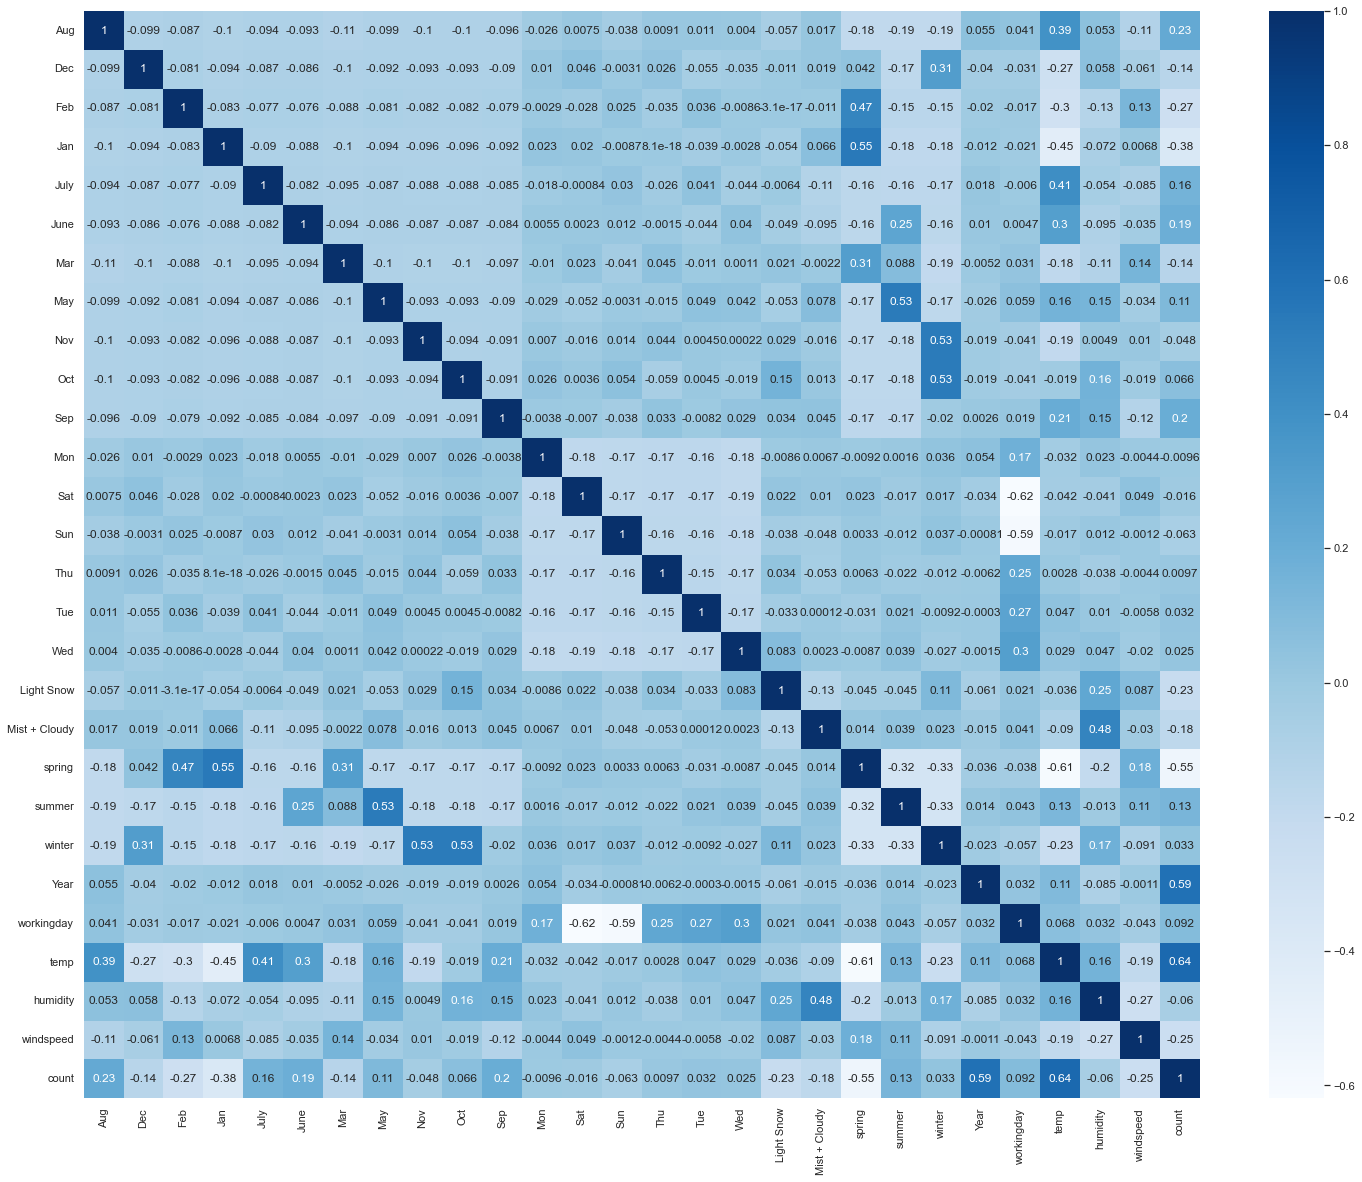

In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(Bikes_train.corr(),cmap='Blues',annot = True)
plt.show()

From the heatmap we can see temp, year is highly correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

# Dividing into X and Y sets for the model building


In [50]:
#Divide the data into X and y
y_train = Bikes_train.pop('count')
X_train = Bikes_train

## Step 7: Building a linear model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


 # RFE Recursive Feature Elimination 

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [54]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [55]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed'],
      dtype='object')

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building model using statsmodel, for the detailed statistics

# Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.


# Model 1

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,32.81
12,temp,19.97
11,workingday,18.57
7,spring,5.04
3,Sat,4.95
14,windspeed,4.92
4,Sun,4.79
9,winter,3.76
8,summer,3.03
6,Mist + Cloudy,2.31


In [58]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)


In [59]:
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [60]:
# Check the parameters obtained

lr1.params

const            0.192512
Jan             -0.034326
July            -0.053193
Sep              0.081186
Sat              0.112251
Sun              0.058529
Light Snow      -0.248777
Mist + Cloudy   -0.057824
spring          -0.050806
summer           0.049660
winter           0.094426
Year             0.230502
workingday       0.102050
temp             0.509836
humidity        -0.154716
windspeed       -0.185956
dtype: float64

In [61]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.31e-191
Time:                        11:14:47   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1925      0.042      4.537

## Model 2

In [62]:
# Removing the variable 'Jan' based on its High P value and low VIF value.
X_train_new = X_train_rfe.drop(["Jan"], axis = 1)

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,32.14
11,temp,18.98
10,workingday,18.41
2,Sat,4.91
13,windspeed,4.90
6,spring,4.80
3,Sun,4.76
8,winter,3.71
7,summer,3.03
5,Mist + Cloudy,2.31


In [64]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [65]:
# Check the parameters obtained

lr2.params

const            0.179945
July            -0.054881
Sep              0.081773
Sat              0.112637
Sun              0.059434
Light Snow      -0.246332
Mist + Cloudy   -0.057847
spring          -0.055434
summer           0.052613
winter           0.100294
Year             0.229738
workingday       0.102650
temp             0.527819
humidity        -0.159467
windspeed       -0.180601
dtype: float64

In [66]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.13e-191
Time:                        11:15:51   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1799      0.042      4.276

## Model 3

In [67]:
#Removing the variable 'humidity' based on its Very High 'VIF' value and low P value.
X_train_new = X_train_new.drop(["humidity"], axis = 1)

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,16.19
11,temp,12.73
12,windspeed,4.75
2,Sat,4.45
3,Sun,4.21
6,spring,3.82
8,winter,2.80
7,summer,2.75
9,Year,2.07
0,July,1.60


In [69]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [70]:
lr3.params

const            0.100521
July            -0.049971
Sep              0.075781
Sat              0.115156
Sun              0.057148
Light Snow      -0.290444
Mist + Cloudy   -0.083515
spring          -0.065288
summer           0.046496
winter           0.085870
Year             0.233626
workingday       0.103407
temp             0.492017
windspeed       -0.149124
dtype: float64

In [71]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.73e-189
Time:                        11:16:49   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1005      0.038      2.618

## Model 4

In [72]:
#Removing the variable 'Workingday' based on its Very High VIF-value and low p-value.
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.17
11,windspeed,4.62
7,summer,2.23
6,spring,2.11
9,Year,2.07
8,winter,1.82
0,July,1.59
5,Mist + Cloudy,1.55
1,Sep,1.33
2,Sat,1.22


In [74]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [75]:
lr4.params

const            0.200531
July            -0.049155
Sep              0.072144
Sat              0.015705
Sun             -0.042224
Light Snow      -0.285761
Mist + Cloudy   -0.081613
spring          -0.067880
summer           0.046884
winter           0.082950
Year             0.234126
temp             0.493363
windspeed       -0.151323
dtype: float64

In [76]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.01e-186
Time:                        11:18:23   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2005      0.030      6.771

## Model 5

In [77]:
#Removing the variable 'Sat' based on its Very High p-value and low VIF value.
X_train_new = X_train_new.drop(["Sat"], axis = 1)

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.13
10,windspeed,4.60
6,summer,2.22
5,spring,2.09
8,Year,2.07
7,winter,1.80
0,July,1.59
4,Mist + Cloudy,1.55
1,Sep,1.33
2,Sun,1.17


In [79]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [80]:
lr5.params

const            0.203597
July            -0.048589
Sep              0.072143
Sun             -0.045092
Light Snow      -0.285572
Mist + Cloudy   -0.081580
spring          -0.067986
summer           0.046724
winter           0.083127
Year             0.233796
temp             0.492253
windspeed       -0.149759
dtype: float64

In [81]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.65e-187
Time:                        11:19:16   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2036      0.030      6.889

## Model 6

#Removing the variable 'Sunday' based on its low VIF-value and High P value.
X_train_new = X_train_new.drop(["Sun"], axis = 1)

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.13
10,windspeed,4.60
6,summer,2.22
5,spring,2.09
8,Year,2.07
7,winter,1.80
0,July,1.59
4,Mist + Cloudy,1.55
1,Sep,1.33
2,Sun,1.17


In [83]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [84]:
lr6.params

const            0.203597
July            -0.048589
Sep              0.072143
Sun             -0.045092
Light Snow      -0.285572
Mist + Cloudy   -0.081580
spring          -0.067986
summer           0.046724
winter           0.083127
Year             0.233796
temp             0.492253
windspeed       -0.149759
dtype: float64

In [85]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.65e-187
Time:                        11:20:31   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2036      0.030      6.889

In [86]:
## Model 7

In [87]:
#Removing the variable 'July' based on its High 'p-value' and low VIF value.
X_train_new = X_train_new.drop(["July"], axis = 1)

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.59
8,temp,3.90
7,Year,2.07
4,spring,2.00
5,summer,1.90
6,winter,1.64
3,Mist + Cloudy,1.54
0,Sep,1.22
1,Sun,1.17
2,Light Snow,1.08


In [89]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [90]:
lr7.params

const            0.195762
Sep              0.085344
Sun             -0.046247
Light Snow      -0.286518
Mist + Cloudy   -0.080314
spring          -0.056954
summer           0.061288
winter           0.095113
Year             0.234324
temp             0.479893
windspeed       -0.149907
dtype: float64

In [91]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.93e-187
Time:                        11:21:46   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1958      0.030      6.620

 Finally we have our model ! The VIFs and p-values both are within an acceptable range.


 So we go ahead and make our predictions using this model only.
- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.829 or 82.9%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.826 or 82.6%


So our model is lr8 which is obtained by removing January, saturday , Sunday , Workingday ,July and humidity variables from the RFE support columns.

# Final Model Interpretation

# Hypothesis testing

#Hypothesis testing states that:

#H0:B1=B2=...=Bn=0 (Coefficient values are equal to zero) #H1: at least one Bi!=0 (Atleast one Coefficient value should not be equal to zero)

In [92]:
lr7.params

const            0.195762
Sep              0.085344
Sun             -0.046247
Light Snow      -0.286518
Mist + Cloudy   -0.080314
spring          -0.056954
summer           0.061288
winter           0.095113
Year             0.234324
temp             0.479893
windspeed       -0.149907
dtype: float64

Insight:

From the lr7 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS.

# F- Statistics


F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 280.6
Prob (F-statistic): 1.21e-179

The F-Statistics value of 280.6 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

# Step 8: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

# Let's check the assumpitions of Linear Regression.

In [93]:
#X_train_lm7=sm.add_constant(X_train_lm7)
#X_train_lm7.columns
X_train_lm7

,const,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp,windspeed
653,1.0,0,0,0,0,0,0,1,1,0.509887,0.300794
576,1.0,0,0,0,0,0,0,0,1,0.815169,0.264686
426,1.0,0,0,0,1,1,0,0,1,0.442393,0.255342
728,1.0,0,1,0,0,1,0,0,1,0.245101,0.663106
482,1.0,0,0,0,1,0,1,0,1,0.395666,0.188475
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,0,0,1,0,1,0,1,0.824514,0.355596
578,1.0,0,0,0,0,0,0,0,1,0.863973,0.187140
53,1.0,0,0,0,0,1,0,0,0,0.202618,0.111379
350,1.0,0,0,0,1,0,0,1,0,0.248216,0.431816


In [94]:
#y train predicted
y_train_count = lr7.predict(X_train_lm7)

In [95]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

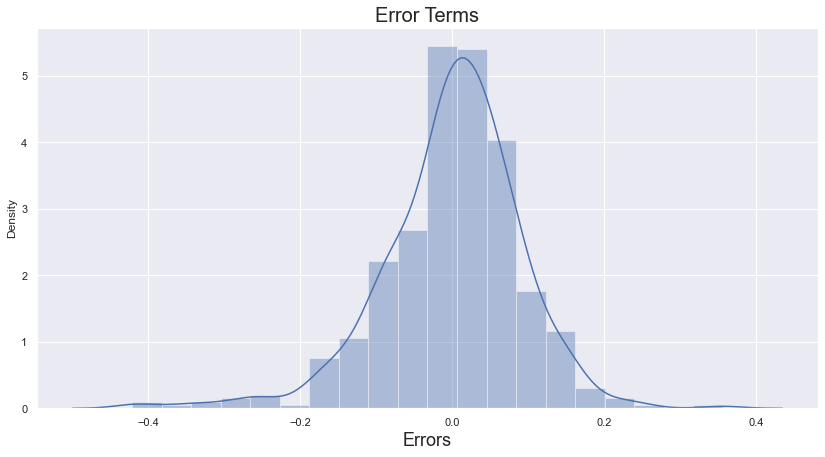

In [96]:
# Plot the histogram of the error terms

fig = plt.figure()

plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_count), bins = 20)

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Insights:

From the above histogram, we could see that the Error terms are normally distributed. Hence our assumption for Linear Regression is valid.

 # Step 9: Making Predictions

Applying the scaling on the test sets

In [97]:
#Create a list of numeric variables

num_vars=['temp','humidity','windspeed','count']

#Fit on data
Bikes_test[num_vars] = scaler.transform(Bikes_test[num_vars])
Bikes_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0.817246,0.314298,0.537414,0.569029


In [98]:
#Dividing into X_test and y_test
y_test = Bikes_test.pop('count')
X_test = Bikes_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Light Snow,Mist + Cloudy,spring,summer,winter,Year,workingday,temp,humidity,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.027397,0.319635,0.255708,0.264840,0.232877,0.479452,0.698630,0.558941,0.638508,0.313350
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.163612,0.467403,0.437258,0.442259,0.423633,0.500722,0.459904,0.233698,0.148974,0.159947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.759096,0.743928,0.403048
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [99]:
#Columns
X_train_new.columns

Index(['Sep', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'temp', 'windspeed'],
      dtype='object')

In [100]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp,windspeed
184,1.0,0,0,0,1,0,0,0,0,0.831783,0.084219
535,1.0,0,0,0,0,0,1,0,1,0.901354,0.153728
299,1.0,0,0,0,1,0,0,1,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,1,0,0,0.817246,0.537414


In [101]:
# Making predictions
y_count = lr7.predict(X_test_new1)


# Finding R-squared and Adjusted R-Squared for Test set

In [102]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_count)

0.8028405591555072

In [103]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


# Step 10: Model Evaluation

Text(0, 0.5, 'y_count')

<Figure size 432x288 with 0 Axes>

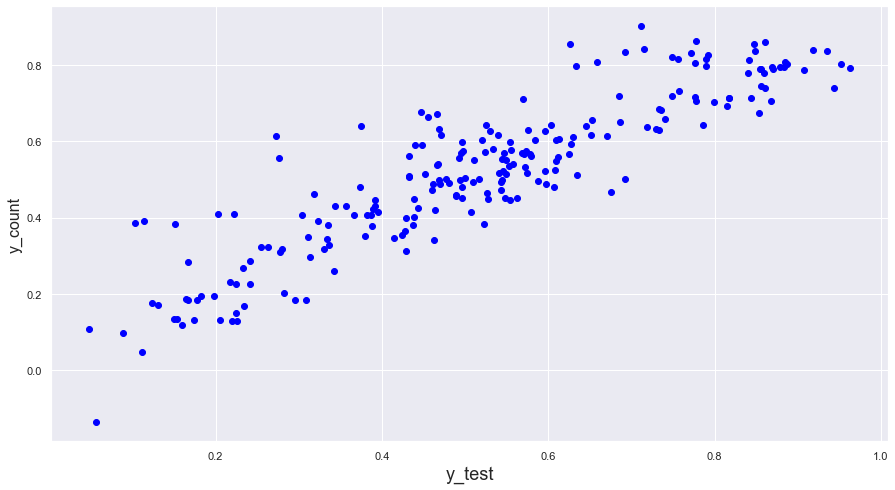

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_count,color='blue')
fig.suptitle('y_test vs y_count', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_count', fontsize=16)                          # Y-label

# Visualising the fit on the test set

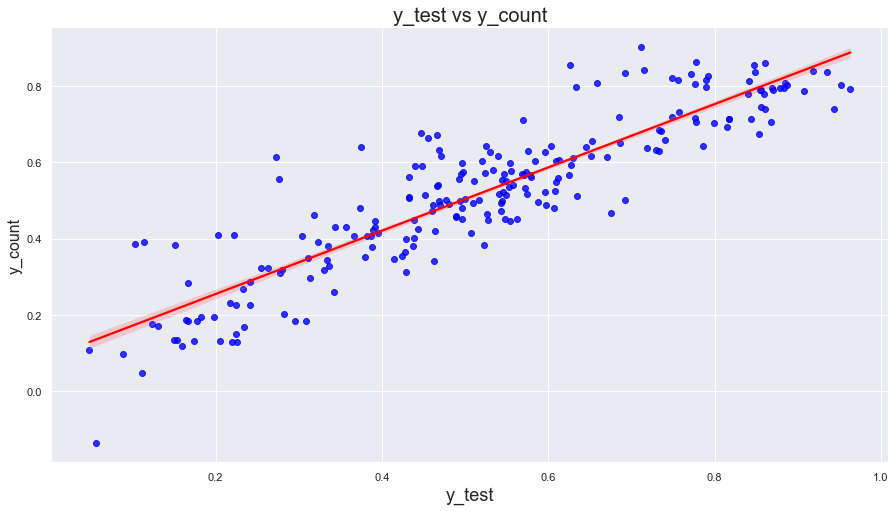

In [105]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_count, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_count', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_count', fontsize=16)                          # Y-label
plt.show()

# We can see that the equation of our best fitted line is:

# count=0.4794×temp+0.0871×september-0.281×lightsnow-0.0784×mistcloudy-0.0576×spring+0.0931×winter+0.2344×year-0.1498windspeed

# Analysis Comparison between Train model and Test:

- Train - R^2 : 0.829
- Train - Adjusted R^2 : 0.826
- Test - R^2: 0.8009
- Test - Adjusted R^2: 0.790564
- Difference in R^2 between train and test: 2.81%
- Difference in adjusted R^2 between Train and test: 3.6%
Hence, we can conclude that it is the best model.